In [88]:
import torch



import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')

from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:302:::  
 2024-09-06 11:47:42 starting optimization of bigclam on sbm3x3 on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 0.01,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 10000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:368:::  
fit wrapper fit_feats, plotting state at iter 9999


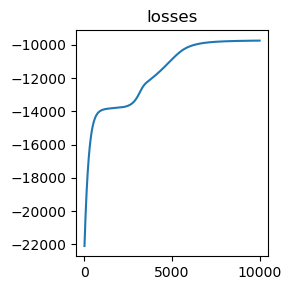

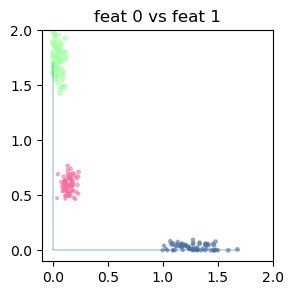



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:410:::  


FINISHED train model on params 
 last accuracies:
losses: -9740.974609375


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  





([-22103.150390625,
  -22070.130859375,
  -22037.22265625,
  -22004.4375,
  -21971.763671875,
  -21939.205078125,
  -21906.7578125,
  -21874.44140625,
  -21842.220703125,
  -21810.119140625,
  -21778.134765625,
  -21746.267578125,
  -21714.505859375,
  -21682.861328125,
  -21651.326171875,
  -21619.8984375,
  -21588.59765625,
  -21557.3984375,
  -21526.3046875,
  -21495.3359375,
  -21464.46484375,
  -21433.712890625,
  -21403.060546875,
  -21372.525390625,
  -21342.103515625,
  -21311.78125,
  -21281.572265625,
  -21251.466796875,
  -21221.474609375,
  -21191.58984375,
  -21161.810546875,
  -21132.138671875,
  -21102.576171875,
  -21073.11328125,
  -21043.763671875,
  -21014.517578125,
  -20985.37109375,
  -20956.3359375,
  -20927.40234375,
  -20898.572265625,
  -20869.8515625,
  -20841.232421875,
  -20812.716796875,
  -20784.306640625,
  -20755.9921875,
  -20727.783203125,
  -20699.68359375,
  -20671.6796875,
  -20643.7734375,
  -20615.9765625,
  -20588.27734375,
  -20560.6796875,
  -

In [90]:
data_sbm3x3 = import_dataset('sbm3x3')

config_triplets = [
    ['clamiter_init', 'dim_feat', 2],
    ['feat_opt', 'n_iter', 10000]
]

trainer_bigclam_sbm3x3 = Trainer(
    dataset=data_sbm3x3, 
    model_name='bigclam',
    config_triplets_to_change=config_triplets,
    device=device)

trainer_bigclam_sbm3x3.train()

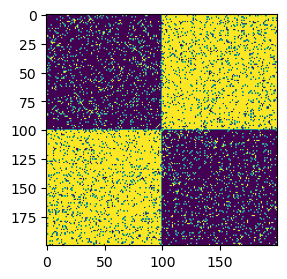

In [49]:
data_bipart = import_dataset('bipartite')
plot_sparse_adj(edge_index=data_bipart.edge_index)



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:302:::  
 2024-09-04 13:43:32 starting optimization of bigclam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:410:::  


FINISHED train model on params 
 last accuracies:
losses: -13749.0224609375


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../utils/plotting.py:27:::  plotting 2 features


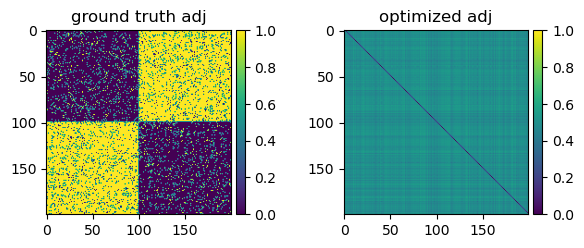

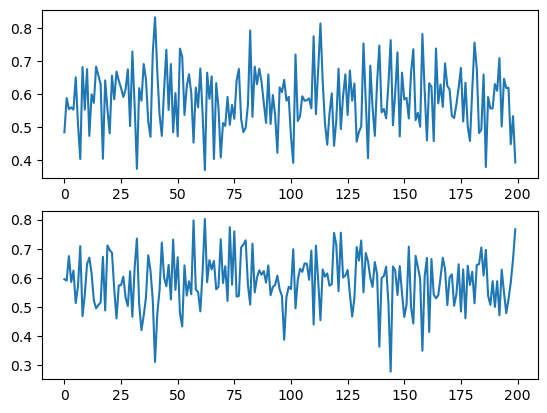

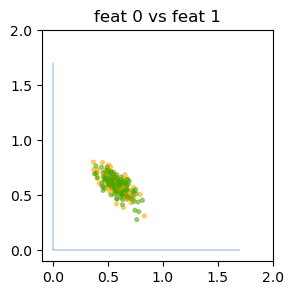

In [75]:

config_triplets=[
# ['feat_opt', 'lr', 0.001],
# ['clamiter_init', 'l1_reg', 0.05],
# ['feat_opt', 'n_iter', 50000]

]

trainer_bigclam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='bigclam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 mighty_configs_dict=False
                                )

_ = trainer_bigclam_bipart.train(plot_every=100000)

trainer_bigclam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], node_size_factor=1)




/home/user/Documents/danny/AAAI_pieclam/experiments/../utils/plotting.py:27:::  plotting 2 features


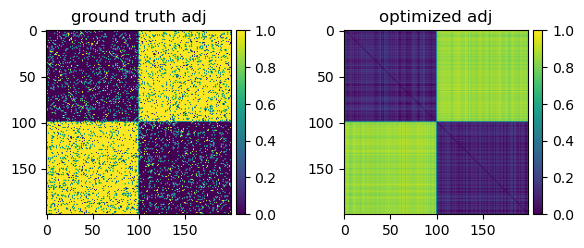

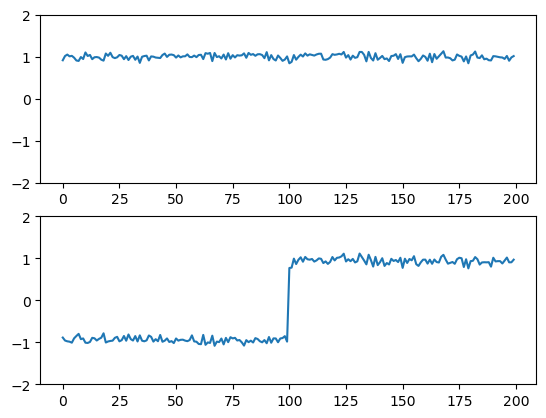

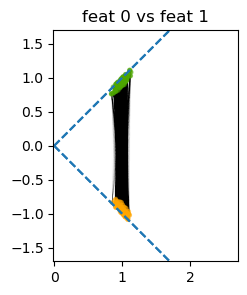

In [82]:
trainer_iegam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:302:::  
 2024-09-04 13:44:00 starting optimization of iegam on bipartite on device cpu

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 2,
        "dim_attr": 64,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:410:::  


FINISHED train model on params 
 last accuracies:
losses: -6609.2744140625


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:416:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../utils/plotting.py:27:::  plotting 2 features


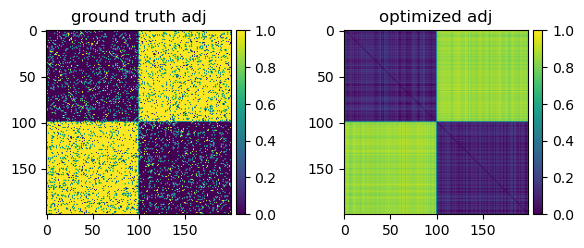

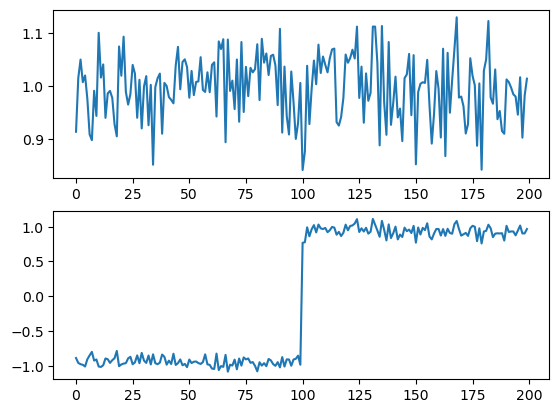

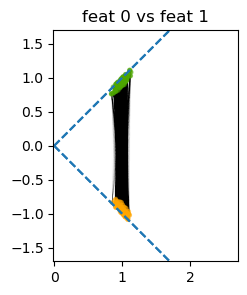

In [76]:

config_triplets=[
# ['clamiter_init', 'dim_feat', 2],

]

trainer_iegam_bipart = Trainer(dataset=data_bipart, 
                                 model_name='iegam',
                                 device='cpu',
                                 config_triplets_to_change=config_triplets,
                                 mighty_configs_dict=False
                                )

_ = trainer_iegam_bipart.train(plot_every=100000)
trainer_iegam_bipart.plot_state(things_to_plot=['adj', '2dgraphs', 'feats'], draw_edges=True)